In [12]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [38]:
train = pd.read_csv('E:\\NextStep\\PdM\\Predictive-Maintenance\\Datasets\\FullDataset\\train_FD001.csv')
test = pd.read_csv('E:\\NextStep\\PdM\\Predictive-Maintenance\\Datasets\\FullDataset\\test_FD001.csv')

In [53]:
# Exponential Weighted Mean on Training Data
df_train = train.drop(['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor8','Sensor9', 'Sensor13', 'Sensor19', 'Sensor21', 'Sensor22'], axis=1)
ewm_train = df_train.drop(['Cycles', 'Remaining Cycles'], axis = 1)
ewm_train = ewm_train.groupby('Engine').transform(lambda x: x.ewm(10).mean())
ewm_train.reset_index(inplace=True, drop = True)

# Exponential Weighted Mean on Test Data
df_test = test.drop(['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4', 'Sensor8','Sensor9', 'Sensor13', 'Sensor19', 'Sensor21', 'Sensor22'], axis=1)
ewm_test = df_test.drop(['Cycles', 'Remaining Cycles'], axis = 1)
ewm_test = ewm_test.groupby('Engine').transform(lambda x: x.ewm(10).mean())
ewm_test.reset_index(inplace=True, drop = True)

# Fit and Transform to Standard Scaling on training data
ss = StandardScaler()
ss.fit(ewm_train.iloc[:, 2:-1])
scaled_train = ss.transform(ewm_train.iloc[:, 2:-1])
scaled_train = pd.DataFrame(columns = ewm_train.iloc[:, 2:-1].columns, data = scaled_train)

# Transform to Standard Scaling on test data
scaled_test = ss.transform(ewm_test.iloc[:, 2:-1])
scaled_test = pd.DataFrame(columns = ewm_test.iloc[:, 2:-1].columns, data = scaled_test)

# Extract First Principal Component from scaled training data
pca = PCA(n_components = 0.99)
pca.fit(scaled_train)
pca_train = pca.transform(scaled_train)
scaled_train['PC1'] =  pca_train[:, 0]
scaled_train['Cycles'] = df_train['Cycles']

# Extract First Principal Component from scaled test data
pca_test = pca.transform(scaled_test)
scaled_test['PC1'] =  pca_test[:, 0]
scaled_test['Cycles'] = df_test['Cycles']

# Write to CSV
scaled_train.to_csv('XTrain.csv', index = False)
df_train['Remaining Cycles'].to_csv('YTrain.csv', index = False)
df_train['Engine'].to_csv('Engine.csv', index = False)

scaled_test.to_csv('XTest.csv', index = False)
df_test['Remaining Cycles'].to_csv('YTest.csv', index = False)

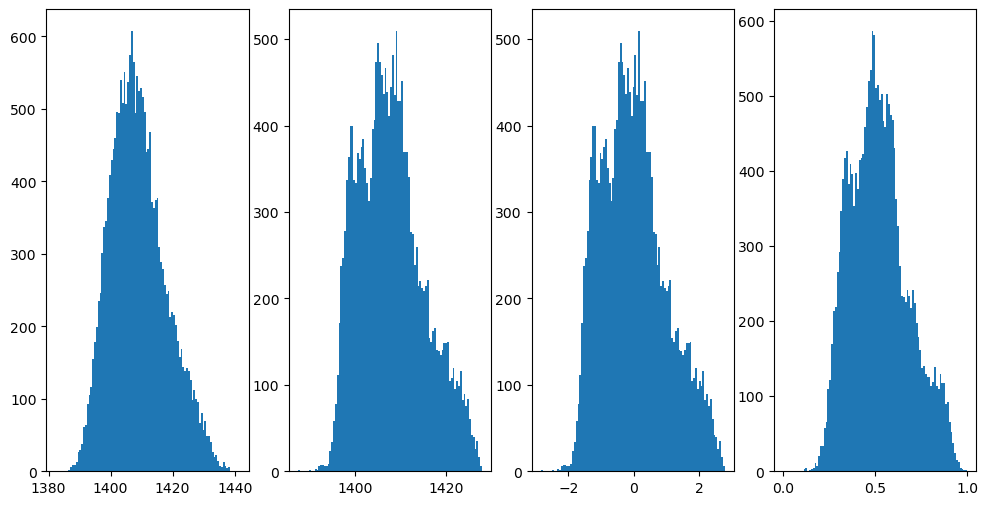

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,4, figsize=(12,6))
ax[0].hist(df_train['Sensor7'], bins=100)
ax[1].hist(ewm_train['Sensor7'], bins=100)
ax[2].hist(scaled_train['Sensor7'], bins=100);
mm = MinMaxScaler()
temp = mm.fit_transform(ewm_train.loc[:2:-1])
ax[3].hist(temp[:,0], bins = 100);